# **COUPON RECOMMENDATION SYSTEM**

In [1]:
# --- Step 1: Import Libraries ---
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:

# --- Step 2: Load Dataset ---
df = pd.read_csv("/content/drive/MyDrive/DS_DATA (1).csv")
print("Data loaded successfully:", df.shape)
df.head()


Data loaded successfully: (12684, 25)


,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
# --- Step 3: Data Cleaning ---
print("Missing values before cleaning:\n", df.isnull().sum())

# Fill missing categorical values with mode, numerical values with median
for c in df.select_dtypes("object"):
    df[c].fillna(df[c].mode()[0], inplace=True)
for c in df.select_dtypes(["int64", "float64"]):
    df[c].fillna(df[c].median(), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)
print("Data cleaned successfully:", df.shape)


Missing values before cleaning:
 destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept(Y/N?)                0
dtype: int64
Data cleaned successfully: (12393, 25)


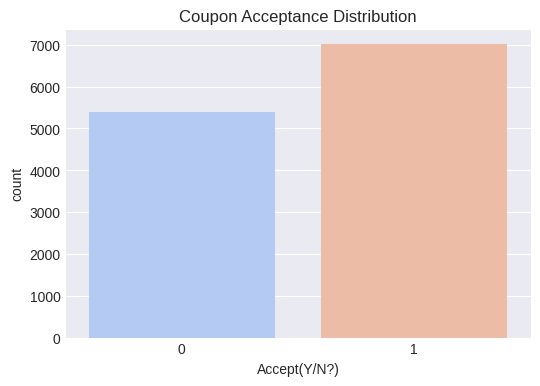

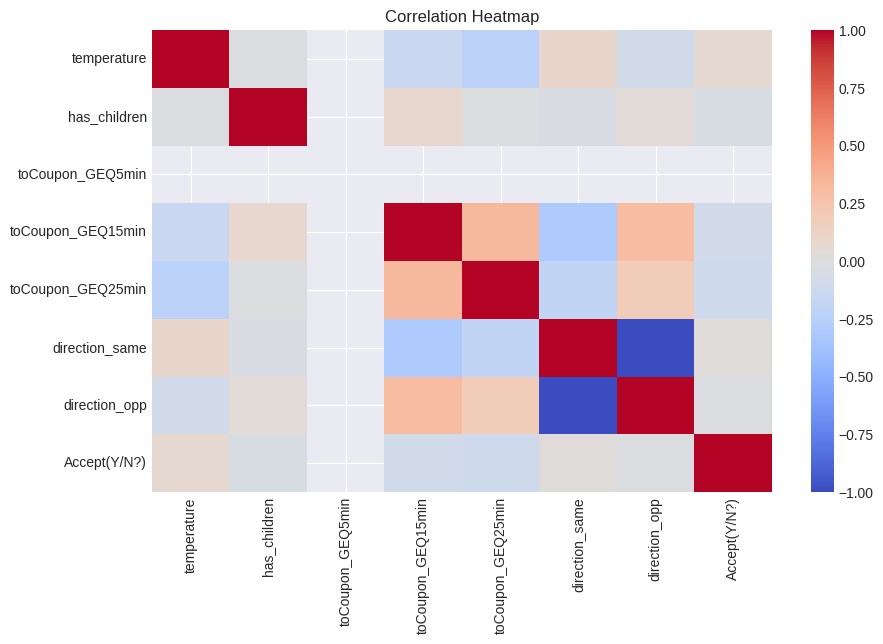

In [4]:
# --- Step 4: Exploratory Data Analysis ---
plt.figure(figsize=(6,4))
sns.countplot(x='Accept(Y/N?)', data=df, palette='coolwarm')
plt.title('Coupon Acceptance Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


In [5]:
# --- Step 5: Feature Encoding & Scaling ---
X = df.drop('Accept(Y/N?)', axis=1)
y = df['Accept(Y/N?)']

# Label encode categorical columns
le = LabelEncoder()
for col in X.select_dtypes('object'):
    X[col] = le.fit_transform(X[col].astype(str))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Data prepared for modeling:", X_train.shape, X_test.shape)


Data prepared for modeling: (8675, 24) (3718, 24)


In [6]:
# --- Step 6: Train Multiple Models ---
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else np.zeros(len(y_pred))
    results.append((name,
                    round(accuracy_score(y_test, y_pred),3),
                    round(f1_score(y_test, y_pred),3),
                    round(roc_auc_score(y_test, proba),3)))

results_df = pd.DataFrame(results, columns=['Model','Accuracy','F1 Score','ROC-AUC']).sort_values('Accuracy', ascending=False)
print("Model Comparison Results:")
display(results_df)


Model Comparison Results:


,Model,Accuracy,F1 Score,ROC-AUC
2,Random Forest,0.736,0.778,0.791
3,Gradient Boosting,0.713,0.762,0.773
5,SVM,0.671,0.731,0.726
1,Decision Tree,0.669,0.704,0.667
0,Logistic Regression,0.626,0.700,0.658
6,KNN,0.622,0.681,0.654
4,Naive Bayes,0.602,0.693,0.643


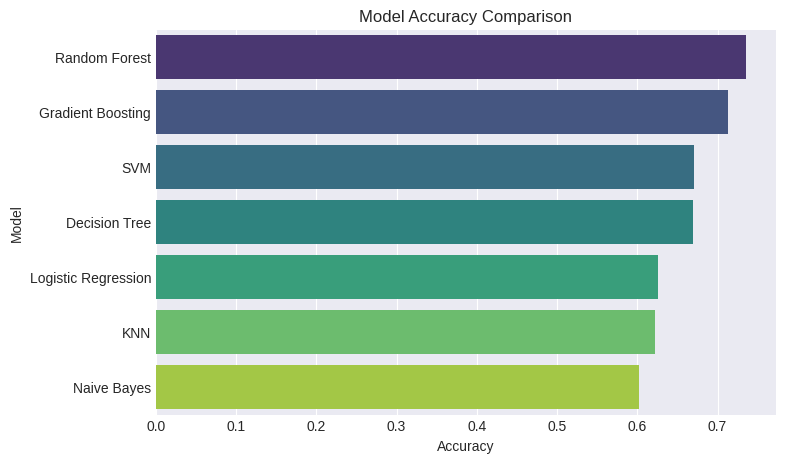

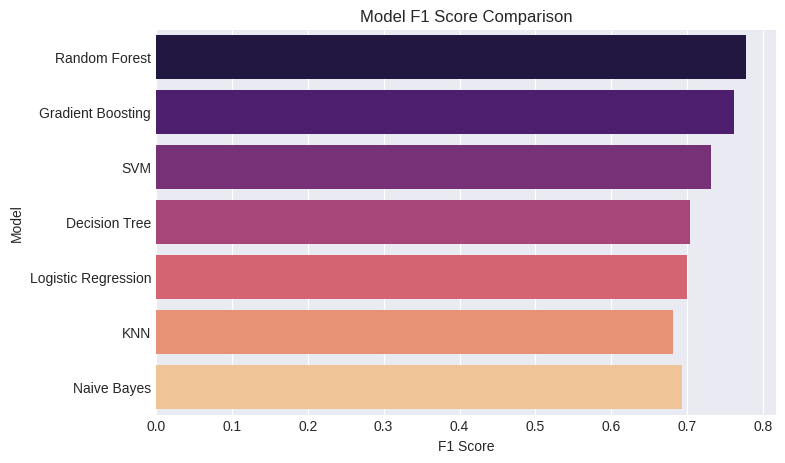

In [7]:
# --- Step 7: Model Comparison Visualization ---
plt.figure(figsize=(8,5))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='F1 Score', y='Model', data=results_df, palette='magma')
plt.title("Model F1 Score Comparison")
plt.show()


Random Forest Performance:
Accuracy: 0.73
F1 Score: 0.775
ROC-AUC: 0.79

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.61      0.66      1614
           1       0.73      0.82      0.77      2104

    accuracy                           0.73      3718
   macro avg       0.73      0.72      0.72      3718
weighted avg       0.73      0.73      0.73      3718



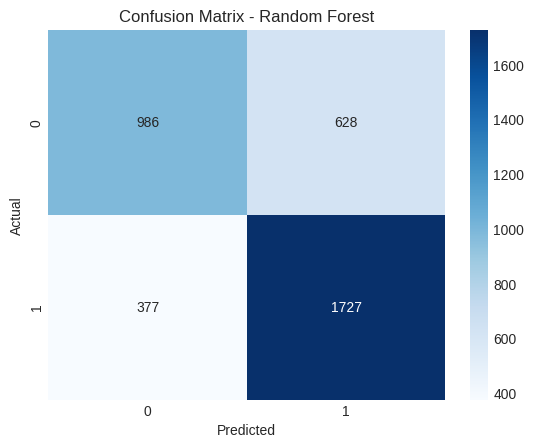

In [8]:
# --- Step 8: Final Model ---
rf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("F1 Score:", round(f1_score(y_test, y_pred),3))
print("ROC-AUC:", round(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]),3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


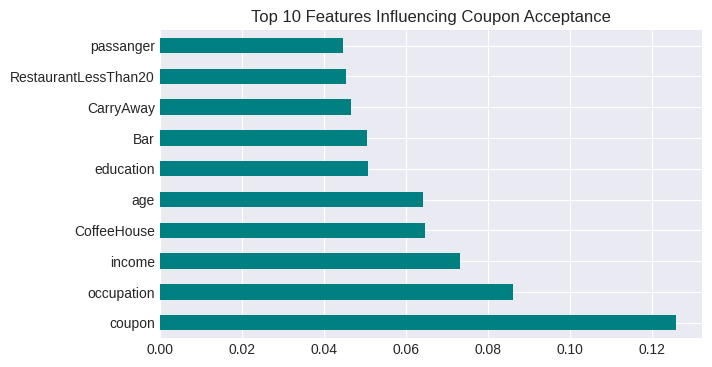

In [9]:
# --- Step 9: Feature Importance ---
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]
plt.figure(figsize=(7,4))
feat_imp.plot(kind='barh', color='teal')
plt.title("Top 10 Features Influencing Coupon Acceptance")
plt.show()


In [10]:
# --- Step 10: Final Summary ---
best_model = results_df.iloc[0]['Model']
print(f"Best Model: {best_model}")

if best_model == 'Random Forest':
    print("""
🔹 Random Forest performed best with highest accuracy and F1 score.
🔹 It handles both categorical & numerical data effectively.
🔹 Robust against overfitting compared to Decision Tree.
🔹 Provides feature importance for interpretability.
""")

print("""
BUSINESS INSIGHTS:
--------------------
• Customers with higher social activity (Bar/CoffeeHouse visits) are more likely to accept coupons.
• Weather, Income, and Destination type play key roles.
• Middle-aged groups with stable income are top converters.
• Focus campaigns during favorable contexts (Sunny weather, short distances).
""")


Best Model: Random Forest

🔹 Random Forest performed best with highest accuracy and F1 score.
🔹 It handles both categorical & numerical data effectively.
🔹 Robust against overfitting compared to Decision Tree.
🔹 Provides feature importance for interpretability.


BUSINESS INSIGHTS:
--------------------
• Customers with higher social activity (Bar/CoffeeHouse visits) are more likely to accept coupons.
• Weather, Income, and Destination type play key roles.
• Middle-aged groups with stable income are top converters.
• Focus campaigns during favorable contexts (Sunny weather, short distances).



In [11]:
# --- Step 11: Save Final Model ---
# import joblib
# joblib.dump(rf, 'coupon_rf_basic_model.pkl')
# print("✅ Model saved successfully: coupon_rf_basic_model.pkl")
